# Introduction¶



# overview 
This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue


# Questions

Question 1: Which movie had highest and lowest revenue

Question 2: Which Movies with largest and lowest budgets

Question 3: Which movie has made the most and least profit

Question 4: Average runtime of all the movies

Question 5: Average Budget of the movies

Question 6: Average duration  of the movies

Question 7: Average vote_average  of the movies

Question 8: Average revenue of the movies

In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('tmdb-movies.csv')

#printing first five rows with defined columns of tmdb-movies database
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# get a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# return a tuple of the dimensions of the dataframe
df.shape

(10866, 21)

In [5]:
# Generates descriptive statistics, excluding NaN values
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


###### Check for missing data

In [6]:
df.columns[df.isnull().any()]

Index(['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords',
       'overview', 'genres', 'production_companies'],
      dtype='object')

######  Removing Unused columns 

In [7]:
# list of column to be deleted
delete_col= ['imdb_id','homepage', 'keywords', 'overview', 'production_companies','tagline','genres','cast','director']

# deleting the columns
df= df.drop(delete_col,1)

# previewing the new dataset
df.head(4)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


###### Removing the duplicacy 

In [8]:
# drop duplicates
df.drop_duplicates(inplace=True)

# confirm correction
sum(df.duplicated())

0

###### Changing the release date column into standard date format



In [9]:
df.release_date = pd.to_datetime(df['release_date'])


In [10]:
df.head(4)

,id,popularity,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09


###### Discarding for 0 value in budget and revenue column


In [11]:
# creating temporary of revenue and budget column
temp=['budget', 'revenue']
#this will replace all the value from '0' to NAN in the list
df[temp] = df[temp].replace(0, np.NAN)
#Removing all the row which has NaN value in temp 
df.dropna(subset = temp, inplace = True)
rows, col = df.shape

###### Replacing zero with NAN in runtime column

In [12]:
# replacing 0 with NaN of runtime column in the dataset
df['runtime'] = df['runtime'].replace(0, np.NAN)

# Exploratory Data Analysis¶

###### Research Question 1 : Which movie had highest and lowest revenue

In [13]:
 #reusable function to calculate lowest and highest valuebased on specific column
def calc_low_high(col):
    # for lowest 
    low = df[col].idxmin()
    res_low = pd.DataFrame(df.loc[low])
    
    #for highest 
    high = df[col].idxmax()
    res_high = pd.DataFrame(df.loc[high])
    
    #concat the 
    result = pd.concat([res_low, res_high], axis=1)
    
    return result

# calling the function for revenue column
calc_low_high('revenue')

,5067,1386
id,13537,19995
popularity,0.462609,9.43277
budget,6e+06,2.37e+08
revenue,2,2.78151e+09
original_title,Shattered Glass,Avatar
runtime,94,162
release_date,2003-11-14 00:00:00,2009-12-10 00:00:00
vote_count,46,8458
vote_average,6.4,7.1
release_year,2003,2009


Column with id 1386 shows the largest revenue earned 2.78151e+09
 dollar

Whereas the column with id 5067 shows the smallest revenue earned2 dollar



###### Research Question 2 : Which Movies with largest and lowest budgets

In [14]:
calc_low_high('budget')

,2618,2244
id,39964,46528
popularity,0.090186,0.25054
budget,1,4.25e+08
revenue,100,1.10876e+07
original_title,Lost & Found,The Warrior's Way
runtime,95,100
release_date,1999-04-23 00:00:00,2010-12-02 00:00:00
vote_count,14,74
vote_average,4.8,6.4
release_year,1999,2010


Column with id 2244 shows the largest budget 4.25e+08 dollar

Whereas the column with id 2618 shows the smallest budget 1 dollar




###### Research Question 3: Which movie has made the most and least profit

In [15]:
if 'profit' not in df.columns:
    df.insert(2,'profit',df['revenue']-df['budget'])
    

In [16]:
calc_low_high('profit')


,2244,1386
id,46528,19995
popularity,0.25054,9.43277
profit,-4.13912e+08,2.54451e+09
budget,4.25e+08,2.37e+08
revenue,1.10876e+07,2.78151e+09
original_title,The Warrior's Way,Avatar
runtime,100,162
release_date,2010-12-02 00:00:00,2009-12-10 00:00:00
vote_count,74,8458
vote_average,6.4,7.1


Column with id 1386 shows the highest earned profit 2.54451e+09

Whereas the column with id 2244 shows the lowest earned profit -4.13912e+08	

###### Research Question 4: Average runtime of all the movies

In [17]:
# defining a function to find average of a column
def avg_fun(column):
    return df[column].mean()
#calling above function
avg_fun('runtime')

109.22029060716139

So the average runtime a movie is 109 minutes. Lets analyse it in a visual form  by graphical approach

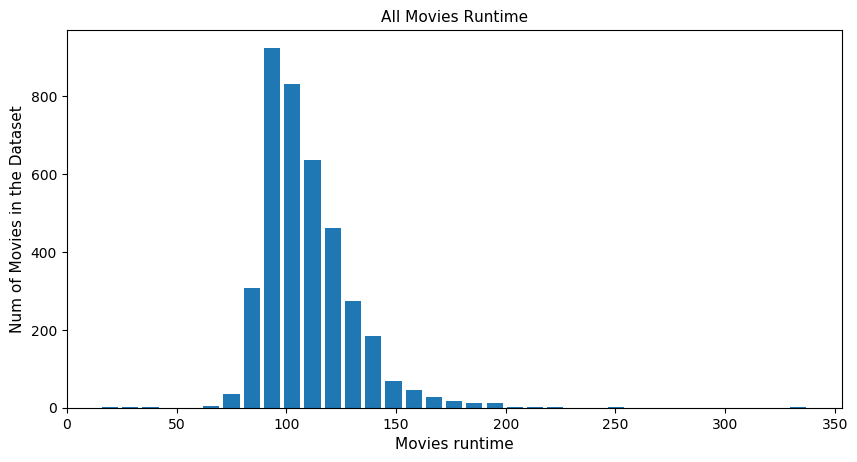

In [18]:
#plotting a histogram of runtime of movies
plt.figure(figsize=(10,5), dpi = 100)

#On x-axis 
plt.xlabel('Movies runtime', fontsize = 11, color='black')
#On y-axis 
plt.ylabel('Num of Movies in the Dataset', fontsize=11, color='black')
#Name of the graph
plt.title('All Movies Runtime', fontsize=11, color='black')

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.8, bins =35)
#displays the plot
plt.show()

The distribution of the above formed graph is positively skewed to the right. Most of the movies are timed between 80 to 115 minutes. 



###### Lets analyzing more about movie runtime using different kind of plots like Box Plot and Data Point Plot

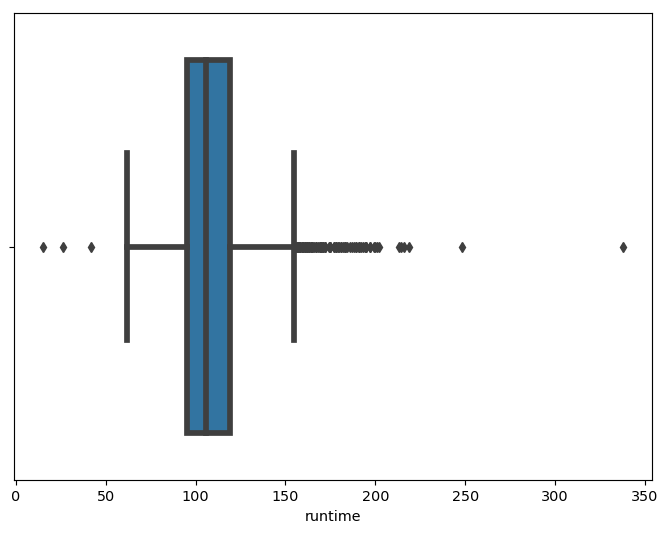

In [19]:
import seaborn as sns
#The First plot is box plot of the runtime of the movies 
plt.figure(figsize=(8,6), dpi = 103)

#using seaborn to generate the boxplot
sns.boxplot(df['runtime'], linewidth = 4)
#diplaying the plot
plt.show()

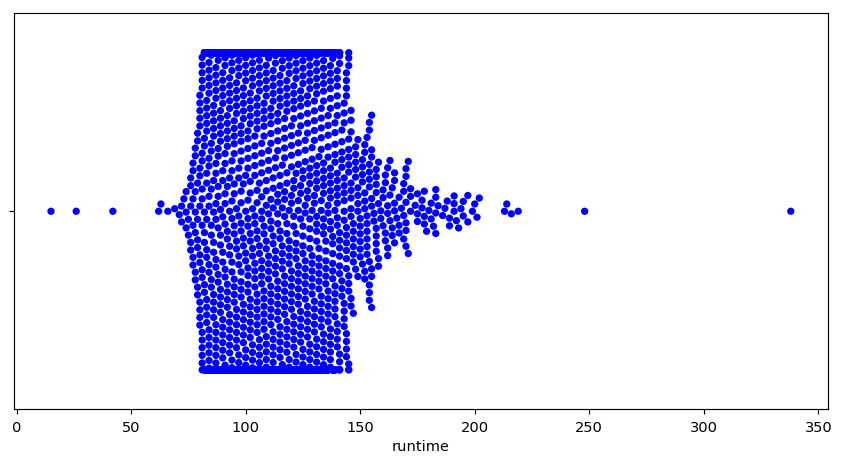

In [20]:
# the second plots is the data point plot of runtime of movies

plt.figure(figsize=(10,5), dpi = 105)
#using seaborn to generate the plot 
sns.swarmplot(df['runtime'], color = 'blue')
#displaying the plot
plt.show()

In [21]:
#getting specific runtime 
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

hats amazing The plot generated above give a visual of complete distribution of runtime of movies by plotting the points againts their respective position in the ditribution



Coming to our first plot i.e. box-plot, It gives us an overall idea of how spreaded the ditribution is in case of runtime of the movies

By looking at both the plot and calculations, we can conclude that..

25% of movies have a runtime of less than 95 minutes

50% of movies have a runtime of less than 109 minutes. (median)

75% of movies have a runtime of less than 119 minutes

### With respect to the profitable movies¶


In [22]:
# profit mean used for bounds

df['profit'].mean()

70482919.14322782

In [23]:
#selecting the movies having profit $70M or more
profitlable = df[df['profit'] >= 70482919]

#reindexing new data
profitlable.index = range(len(profitlable))

#we will start from 1 instead of 0 
profitlable.index = profitlable.index+1

#printing the changed dataset
profitlable.head()

,id,popularity,profit,budget,revenue,original_title,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1,135397,32.985763,1.363529e+09,150000000.0,1.513529e+09,Jurassic World,124,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
2,76341,28.419936,2.284364e+08,150000000.0,3.784364e+08,Mad Max: Fury Road,120,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
3,262500,13.112507,1.852382e+08,110000000.0,2.952382e+08,Insurgent,119,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
4,140607,11.173104,1.868178e+09,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
5,168259,9.335014,1.316249e+09,190000000.0,1.506249e+09,Furious 7,137,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [24]:
#counting the no.of rows in the new data base
len(profitlable)

1066

###### Research Question 5: Average Budget of the movies (with respest to the profitable movies)

In [25]:
#New function to find average 
def profit_avg(column):
    return profitlable[column].mean()

# calculate average budget
profit_avg('budget')

66525485.24577861

So the movies having profit of 70 million dollar and more have an average budget of 66 million dollar

###### Research Question 6: Average duration  of the movies (with respest to the profitable movies)

In [26]:
profit_avg('runtime')

114.66697936210132

So the movies having profit of 70 million dollar and more have an average duration of 114 minutes.



###### Research Question 7: Average vote_average  of the movies (with respest to the profitable movies)

In [27]:
profit_avg('vote_average')

6.43574108818011

So the movies having profit of 70 million dollar and more have an average duration of vote average around 6.43 .



###### Research Question 8: Average revenue of the movies (with respest to the profitable movies)

In [28]:
profit_avg('revenue')

295445263.5703565

So the movies having profit of 70 million dollar and more have an average revenue  of 295 million dollar

# Conclusions

This was a very interesting data analysis

The success of the movies has standards and conditions

1.Avarage Budget must be around 66 Million dollar

2.Avarage duration of the movie must be 114 minutes

3.Avarge vote_Average around 6.43

The movie would be prfotable, therefore,it can earn an average revenue around $295 million by following of these 

standards and suggestions




# Limitations:
This analysis process was done considering the movies which had a significant amount of profit of around $70 million

As per our observation the budget and revenue column do not have any currency unit or documentation representing

what exactly currency mechanism used, it might be some possibility of different movies have budget in different 

currency unit. Moreover we are not sure if the data provided to us is complete corect and up-to-date